# Support Vector Regression (SVR)

## Importing the libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [49]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [50]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [51]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [52]:
y = y.reshape(len(y) , 1) # this reshape function takes no.of rows in which it is to be reshaped and no.of columns. We are reshaping it cuz in feature scaling, fit_transform() expects it to be a 2D array just like x printed above

In [53]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() # we creater different objects for dependent and independent variables cuz in fit_transform() they will respectively create mean and all for x and y separately as "both have different means etc", so we can't use same object
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)



In [55]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [56]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [57]:
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf') # it build SVR model with rbf kernel. You'll study kernel in classification. We use kernel to make svr model linear or non linear depending upon kernel 
regressor.fit(x , y) # training the above built model on x and y. fit() returns 1D array

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [58]:
sc_y.inverse_transform( [ regressor.predict(sc_x.transform( [[6.5]] )) ] ) # we feature transform 6.5 because we first want result according to feature scaled x and y values.Actually we scale 6.5 on the same scale upon which x and y were scaled. This will give us predected value in the same scale which was applied to y. Output of predection will in the the range of scaling which is ig -3 to 3.
# Now, finally we want predection not in range -3 to 3 but the actual value for that we use reverse scaling method called inverse transform to go back to the original scale of predicted salary y

array([[170370.0204065]])

## Visualising the SVR results

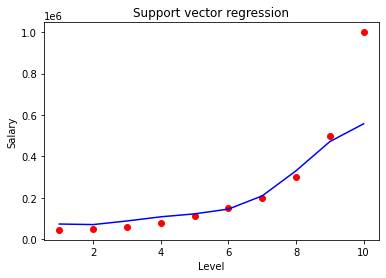

In [59]:
m = regressor.predict(x) # this code shows error on 1D array so we use m so as toreshape it to 2D array
plt.scatter(sc_x.inverse_transform(x) , sc_y.inverse_transform(y) ,color = 'red') # scattering original values of x and y
plt.plot(sc_x.inverse_transform(x) , sc_y.inverse_transform(m.reshape(len(m) , 1)) , color = 'blue' ) # 2nd argument of plot() is m but we reshape predicted array as 2D otherwise it throws error
plt.title('Support vector regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()